In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('Valhalla23.csv')
celsius = df['Celsius']
valks = df['Valks']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_df, test_df = train_test_split(df, test_size=0.2)

# Separar características y etiquetas
train_Celsius = train_df['Celsius']
train_Valks = train_df['Valks']
test_Celsius = test_df['Celsius']
test_Valks = test_df['Valks']

In [2]:
# Sacar las tablas de celsius y valks
Celsius = df.iloc[:, 0]
print(Celsius)
Valks = df.iloc[:, 1]
print(Valks)

# Asignar los valores de las thetas
theta0= 1
theta1 = 1
print(theta0, theta1)


# Cargar el valor del learning rate (alpha)
alpha = 0.0005
print(alpha)

0     61.4720
1     70.5790
2     -7.3013
3     71.3380
4     43.2360
       ...   
95    -7.0094
96    36.8820
97    26.9390
98   -18.8100
99    13.7120
Name: Celsius, Length: 100, dtype: float64
0    -139.7400
1    -156.6000
2      73.2690
3    -165.4200
4     -75.8350
        ...   
95     69.6320
96    -71.2400
97    -34.2550
98    106.4300
99      9.1011
Name: Valks, Length: 100, dtype: float64
1 1
0.0005


In [3]:
# Crear función lambda para la función de hipótesis

h0 = lambda theta0, theta1, x : theta0 + theta1 * x

# Número de muestras en el conjunto de entrenamiento
n = len(train_Celsius)

In [4]:
# Calcular delta para theta0
delta = [h0(theta0, theta1, train_Celsius.iloc[i]) - train_Valks.iloc[i] for i in range(len(train_Celsius))]
print(delta)

# Calcular delta para theta1
deltax = [delta[i] * train_Celsius.iloc[i] for i in range(n)]
print(deltax)

# Calcular sumatorias y promedio
sumdelta = sum(delta)
sumdeltax = sum(deltax)
print(sumdelta)
print(sumdeltax)


[55.361000000000004, -30.8615, 40.56, 62.194, 86.457, -16.4775, 142.895, 166.287, 184.433, 72.566, 133.617, -81.3472, -25.6885, -71.18140000000001, 212.573, -79.5703, 260.949, 49.067, 122.379, 154.124, 70.91, 244.161, 99.822, -105.141, 223.154, -25.233200000000004, 202.21200000000002, 90.468, -88.43, -113.868, 263.064, 144.228, 252.54700000000003, 186.076, -115.299, 23.4059, -54.5887, -14.098099999999999, 228.17899999999997, 36.058, 6.2745999999999995, -63.352799999999995, 207.933, -92.68299999999999, 166.263, -65.2117, 5.610899999999999, 255.289, 128.131, 203.518, 243.869, 156.217, 159.498, -68.1766, 90.79599999999999, 109.12199999999999, 210.73, 237.75799999999998, 172.27, -60.3673, -15.8302, 102.043, -75.6414, 21.036099999999998, 190.154, 90.991, 247.67200000000003, -118.889, -74.21260000000001, -96.297, 26.486200000000004, 187.422, 131.628, -124.24000000000001, 7.392000000000001, 259.571, 120.071, -26.786800000000003, 192.172, 196.498]
[1512.9607690000003, -134.32467875, 968.32944,

In [5]:
# Actualizar theta0
theta0 = theta0 - alpha * sumdelta/n
print(theta0)

# Actualizar theta1
theta1 = theta1 - alpha * sumdeltax/n
print(theta1)

0.961058188125
-2.0061071739653764


In [6]:
# Hacer 100 Iteraciones

for i in range(100):
  # No need to redefine h0 in each iteration
  # h0 = lambda theta0, theta1, x : theta0 + theta1 * x

  # Calculate the number of samples from the training data
  n = len(train_Celsius)  # Use len(train_Celsius) instead of len(df)

  # Calculate delta for theta0 for each sample
  delta = [h0(theta0, theta1, train_Celsius.iloc[i]) - train_Valks.iloc[i] for i in range(n)]

  # Calculate delta for theta1 for each sample
  deltax = [delta[i] * train_Celsius.iloc[i] for i in range(n)]

  # Calculate sums and averages
  sumdelta = sum(delta)
  sumdeltax = sum(deltax)

  # Update theta0
  theta0 = theta0 - alpha * sumdelta/n

  # Update theta1
  theta1 = theta1 - alpha * sumdeltax/n

In [7]:
# Usar el modelo entrenado para predecir los valores en el conjunto de prueba
test_Valks2Estimado = [h0(theta0, theta1, x) for x in test_Celsius]

# Calcular la función de costo en el conjunto de prueba
test_n = len(test_Celsius)
test_Costo = sum((test_Valks2Estimado[i] - test_Valks.iloc[i])**2 for i in range(test_n)) / (2 * test_n)
print(test_Costo)



428.57270476961355


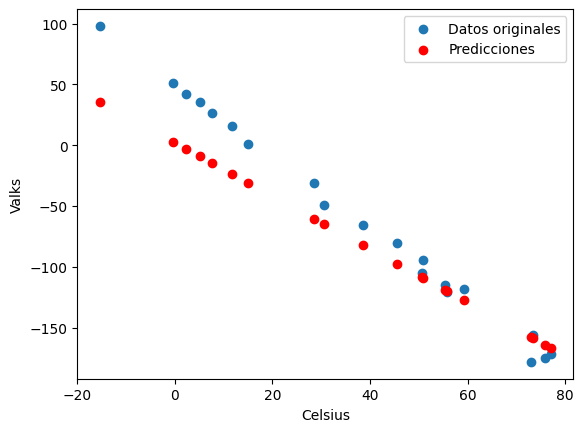

In [8]:
# Graficar datos originales del conjunto de prueba
plt.scatter(test_Celsius, test_Valks, label='Datos originales')

# Graficar datos predichos
plt.scatter(test_Celsius, test_Valks2Estimado, color='red', label='Predicciones')

# Etiquetas y leyenda
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()

# Mostrar gráfica
plt.show()


In [9]:
# Codigo para pasar el notebook a html
import os
from google.colab import drive
drive.mount('/content/drive')
# Listar archivos en el directorio MyDrive/Tarea
os.listdir('/content/drive/MyDrive/Tarea')

Mounted at /content/drive


['Challenge.html',
 'Challenge.gdoc',
 'Challenge2Framework.html',
 'Challenge2Framework.ipynb',
 'Challenge2Framework.gdoc',
 'LaboratorioFramework.html',
 'LaboratorioFramework.ipynb',
 'LaboratorioFramework (1).gdoc',
 'LaboratorioFramework.gdoc',
 'Challenge.ipynb']

In [10]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Tarea/Challenge.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Tarea/Challenge.ipynb to html
[NbConvertApp] Writing 631876 bytes to /content/drive/MyDrive/Tarea/Challenge.html


## Cometarios del profe

- Entregar el readme correctamente
- Entrenar sobre train y probar en test